# Ramsey King
# DSC 550 - Data Mining
# September 18, 2021
# Exercise 3.2

## You can create a new analysis scenario or you can use the tutorials you completed this week.
## A. Display the same analysis (of the same data) using 3 different charts (e.g.,  a bar chart, a line chart and a pie chart)
## B. Use appropriate, complete, professional labeling.
## C. Rank your charts from most effective to least effective.
## D. Write a 300-word paper justifying your ranking.

For my analysis this week, I will use a program that will calculate the overall profit/loss of a stock portfolio based on a handful of stocks and their various purchase dates.  

As some background to this, there are certain online stock brokerage firms that will allow fractional shares to be purchased.  This allows for individuals who may not have enough capital to afford some of the higher priced equities to still be able to benefit from their ownership (without the added risks and time sensitivities that options offer).  For this exercise, we will create a dataframe consisting of 5 equities:

- Amazon (AMZN)
- Disney (DIS)
- Mattel (MAT)
- Vanguard 500 Index Fund (VOO)
- Apple (APPL)

To help with the data collection of these equities, we will incoprorate the help of the very useful Python package yahoo finance or yfinance.

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

We will now get the relevant stock information needed for our analysis, namely the closing stock price of the various industries and the associated dates:

In [2]:
equity_dict = {
    'AMZN': [[15.66, '2019-02-25'], [74.01, '2019-05-20'], [46.00, '2021-09-08']],
    'DIS': [[15.66, '2019-02-25'], [74.01, '2019-05-20']],
    'MAT': [[15.66, '2019-02-25'], [74.01, '2019-05-20']],
    'VOO': [[174.01, '2019-05-20'], [92.00, '2021-09-08']],
    'AAPL': [[46.00, '2021-09-08']]
}

stock_df = yf.Tickers(['AMZN', 'DIS', 'MAT', 'VOO', 'AAPL']).history(start='2019-02-25')['Close']
stock_df.head()

[*********************100%***********************]  5 of 5 completed


,AAPL,AMZN,DIS,MAT,VOO
Date,,,,,
2019-02-25,42.527966,1633.000000,112.218552,13.99,245.561798
2019-02-26,42.552376,1636.400024,112.129639,14.38,245.380249
2019-02-27,42.684185,1641.089966,111.418335,14.49,245.256042
2019-02-28,42.264351,1639.829956,111.477608,14.42,244.682739
2019-03-01,42.708599,1671.729980,112.633484,14.89,246.364441


I realize that the following code is not elegant, Pythonic, and goes against the DRY (Don't Repeat Yourself) rule, however, it is functional.  Time permitting, I will come back to this block and see if I can get a function written that will help reduce the amount of code needed to obtain the desired output.  The desired output is to determine an overall profit/loss for this portfolio that can be used for the matplotlib portion of the exercise.

In [6]:

stock_df['AMZN_CAP_VAL1'] = equity_dict['AMZN'][0][0]/stock_df.loc[equity_dict['AMZN'][0][1], 'AMZN']*stock_df['AMZN']
stock_df['AMZN_P-L_1'] = stock_df['AMZN_CAP_VAL1'] - stock_df.loc[equity_dict['AMZN'][0][1], 'AMZN_CAP_VAL1']

stock_df['AMZN_CAP_VAL2'] = equity_dict['AMZN'][1][0]/stock_df.loc[equity_dict['AMZN'][1][1], 'AMZN']*stock_df['AMZN']
stock_df['AMZN_P-L_2'] = np.where(stock_df.index <= equity_dict['AMZN'][1][1], 0,
                                stock_df['AMZN_CAP_VAL2'] - stock_df.loc[equity_dict['AMZN'][1][1], 'AMZN_CAP_VAL2'])

stock_df['AMZN_CAP_VAL3'] = equity_dict['AMZN'][2][0] / stock_df.loc[equity_dict['AMZN'][2][1], 'AMZN'] * stock_df['AMZN']
stock_df['AMZN_P-L_3'] = np.where(stock_df.index <= equity_dict['AMZN'][2][1], 0,
                                stock_df['AMZN_CAP_VAL3'] - stock_df.loc[equity_dict['AMZN'][2][1], 'AMZN_CAP_VAL3'])

stock_df['DIS_CAP_VAL1'] = equity_dict['DIS'][0][0] / stock_df.loc[equity_dict['DIS'][0][1], 'DIS'] * stock_df['DIS']
stock_df['DIS_P-L_1'] = stock_df['DIS_CAP_VAL1'] - stock_df.loc[equity_dict['DIS'][0][1], 'DIS_CAP_VAL1']

stock_df['DIS_CAP_VAL2'] = equity_dict['DIS'][1][0] / stock_df.loc[equity_dict['DIS'][1][1], 'DIS'] * stock_df['DIS']
stock_df['DIS_P-L_2'] = np.where(stock_df.index <= equity_dict['DIS'][1][1], 0,
                                stock_df['DIS_CAP_VAL2'] - stock_df.loc[equity_dict['DIS'][1][1], 'DIS_CAP_VAL2'])

stock_df['MAT_CAP_VAL1'] = equity_dict['MAT'][0][0] / stock_df.loc[equity_dict['MAT'][0][1], 'MAT'] * stock_df['MAT']
stock_df['MAT_P-L_1'] = stock_df['MAT_CAP_VAL1'] - stock_df.loc[equity_dict['MAT'][0][1], 'MAT_CAP_VAL1']

stock_df['MAT_CAP_VAL2'] = equity_dict['MAT'][1][0] / stock_df.loc[equity_dict['MAT'][1][1], 'MAT'] * stock_df['MAT']
stock_df['MAT_P-L_2'] = np.where(stock_df.index <= equity_dict['MAT'][1][1], 0,
                                stock_df['MAT_CAP_VAL2'] - stock_df.loc[equity_dict['MAT'][1][1], 'MAT_CAP_VAL2'])

stock_df['VOO_CAP_VAL1'] = equity_dict['VOO'][0][0] / stock_df.loc[equity_dict['VOO'][0][1], 'VOO'] * stock_df['VOO']
stock_df['VOO_P-L_1'] = stock_df['VOO_CAP_VAL1'] - stock_df.loc[equity_dict['VOO'][0][1], 'VOO_CAP_VAL1']

stock_df['VOO_CAP_VAL2'] = equity_dict['VOO'][1][0] / stock_df.loc[equity_dict['VOO'][1][1], 'VOO'] * stock_df['VOO']
stock_df['VOO_P-L_2'] = np.where(stock_df.index <= equity_dict['VOO'][1][1], 0,
                                stock_df['VOO_CAP_VAL2'] - stock_df.loc[equity_dict['VOO'][1][1], 'VOO_CAP_VAL2'])

stock_df['AAPL_CAP_VAL1'] = equity_dict['AAPL'][0][0] / stock_df.loc[equity_dict['AAPL'][0][1], 'AAPL'] * stock_df['AAPL']
stock_df['AAPL_P-L_1'] = np.where(stock_df.index <= equity_dict['AAPL'][0][1], 0,
                                stock_df['AAPL_CAP_VAL1'] - stock_df.loc[equity_dict['AAPL'][0][1], 'AAPL_CAP_VAL1'])

stock_df['Total P-L'] = stock_df['AMZN_P-L_1'] + stock_df['AMZN_P-L_2']  + stock_df['AMZN_P-L_3'] + stock_df['DIS_P-L_1'] + \
                        stock_df['DIS_P-L_2'] + stock_df['MAT_P-L_1'] + stock_df['MAT_P-L_2'] + stock_df['VOO_P-L_1'] + \
                        stock_df['VOO_P-L_2'] + stock_df['AAPL_P-L_1']

stock_df.tail()

,AAPL,AMZN,DIS,MAT,VOO,AMZN_CAP_VAL1,AMZN_P-L_1,AMZN_CAP_VAL2,AMZN_P-L_2,AMZN_CAP_VAL3,...,MAT_P-L_1,MAT_CAP_VAL2,MAT_P-L_2,VOO_CAP_VAL1,VOO_P-L_1,VOO_CAP_VAL2,VOO_P-L_2,AAPL_CAP_VAL1,AAPL_P-L_1,Total P-L
Date,,,,,,,,,,,,,,,,,,,,,
2021-09-07,156.690002,3509.290039,184.339996,21.190001,415.029999,33.653081,17.993081,139.713153,65.703153,45.788496,...,8.059472,143.090505,69.080505,288.157737,114.147737,92.088752,0.000000,46.468571,0.000000,314.165428
2021-09-08,155.110001,3525.500000,185.149994,20.430000,414.630005,33.808530,18.148530,140.358510,66.348510,46.000000,...,7.208750,137.958423,63.948423,287.880019,113.870019,92.000000,0.000000,46.000000,0.000000,309.271890
2021-09-09,154.070007,3484.159912,185.910004,20.350000,412.769989,33.412091,17.752091,138.712663,64.702663,45.460603,...,7.119200,137.418205,63.408205,286.588599,112.578599,91.587291,-0.412709,45.691576,-0.308424,304.579123
2021-09-10,148.970001,3469.149902,184.119995,19.990000,409.579987,33.268149,17.608149,138.115079,64.105079,45.264755,...,6.716226,134.987215,60.977215,284.373762,110.363762,90.879479,-1.120521,44.179099,-1.820901,295.121465
2021-09-13,149.550003,3457.169922,184.979996,20.500000,410.540009,33.153265,17.493265,137.638128,63.628128,45.108443,...,7.287105,138.431113,64.421113,285.040310,111.030310,91.092493,-0.907507,44.351106,-1.648894,300.040795


We will now beging the graphing display portion of this exercise.

## A. Display the same analysis (of the same data) using 3 different charts (e.g.,  a bar chart, a line chart and a pie chart)
## B. Use appropriate, complete, professional labeling.
## C. Rank your charts from most effective to least effective.
## D. Write a 300-word paper justifying your ranking.

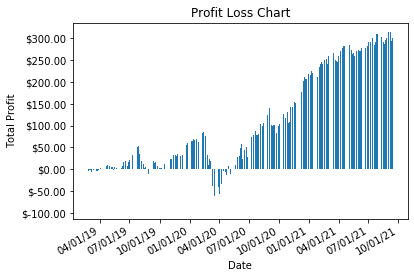

In [28]:
# The bar chart.

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots()
plt.bar(stock_df.index, stock_df['Total P-L'], label='Profit/Loss')


ax.set_xlabel('Date')
# ax.set_xticklabels(stock_df.index, rotation=45)
fig.autofmt_xdate()
ax.set_ylabel('Total Profit')
ax.xaxis.set_major_formatter(DateFormatter('%D'))
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:1.2f}'))
ax.set_title('Profit Loss Chart')
plt.show()

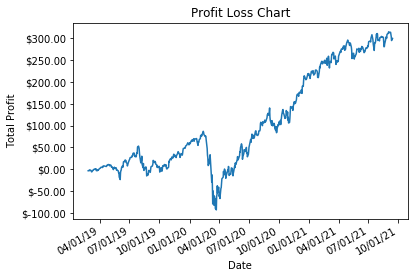

In [29]:
# The line chart.

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots()
plt.plot(stock_df.index, stock_df['Total P-L'], label='Profit/Loss')


ax.set_xlabel('Date')
# ax.set_xticklabels(stock_df.index, rotation=45)
fig.autofmt_xdate()
ax.set_ylabel('Total Profit')
ax.xaxis.set_major_formatter(DateFormatter('%D'))
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:1.2f}'))
ax.set_title('Profit Loss Chart')
plt.show()

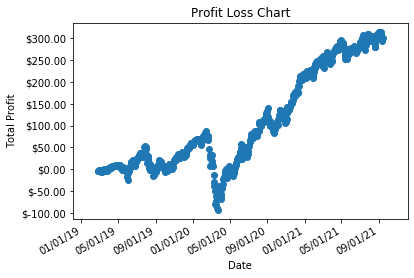

In [32]:
# The pie chart.

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots()
plt.scatter(stock_df.index, stock_df['Total P-L'])


ax.set_xlabel('Date')
# ax.set_xticklabels(stock_df.index, rotation=45)
fig.autofmt_xdate()
ax.set_ylabel('Total Profit')
ax.xaxis.set_major_formatter(DateFormatter('%D'))
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:1.2f}'))
ax.set_title('Profit Loss Chart')
plt.show()